# House Sales Data in King County

This data set shows the sales data for king county such as price, bathrooms,sqft living,floors etc.
The data can be found here for reference-
https://www.kaggle.com/harlfoxem/housesalesprediction/data

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
sns.set_style("white")

In [4]:
df_housing = pd.read_csv('C:/Personal/09142640/Downloads/kc_house_data.csv')
df_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [85]:
df_cont = df_housing.loc[(df_housing['zipcode']==98178) & (df_housing['yr_built']==1955),
    ['price', 'bedrooms', 'sqft_living', 'condition','waterfront', 'grade', 'yr_built', 'zipcode']
]


df_corr =  df_cont.loc[:, 'price':'grade']
df_pca=df_housing.loc[(df_housing['zipcode']==98178) & (df_housing['yr_built']==1955),['price','bedrooms','bathrooms',
'sqft_living','sqft_lot']].dropna()

# Variable to be used

Outcome  variables: price

categorical variables: zipcode,yr_built

Continuous variables: bedrooms, sqft_living, condition, grade,sqft_above

# Univariate

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


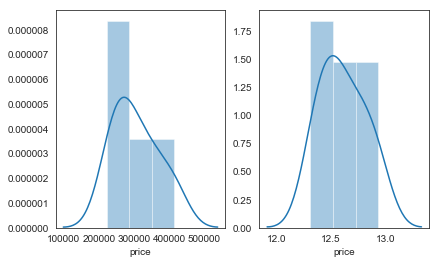

In [92]:
norm = sorted(np.random.normal(0, 1, 455))
f, ax = plt.subplots(figsize=(14,4))
plt.subplot(1, 4, 1)
sns.distplot(df_cont.price)
plt.subplot(1, 4, 2)
sns.distplot(np.log(df_cont.price))

plt.show()

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


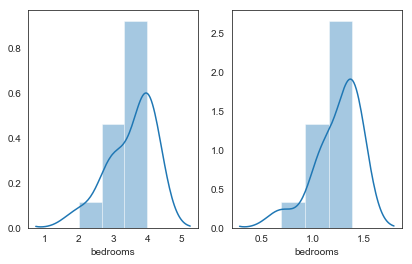

In [93]:
norm = sorted(np.random.normal(0, 1, 455))
f, ax = plt.subplots(figsize=(14,4))
plt.subplot(1, 4, 1)
sns.distplot(df_cont.bedrooms)
plt.subplot(1, 4, 2)
sns.distplot(np.log(df_cont.bedrooms))

plt.show()

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


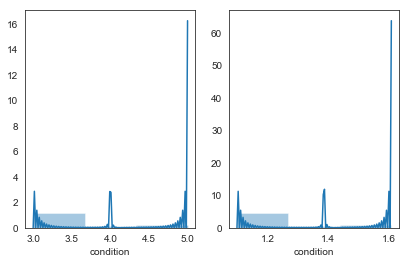

In [94]:
norm = sorted(np.random.normal(0, 1, 455))
f, ax = plt.subplots(figsize=(14,4))
plt.subplot(1, 4, 1)
sns.distplot(df_cont.condition)
plt.subplot(1, 4, 2)
sns.distplot(np.log(df_cont.condition))

plt.show()

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


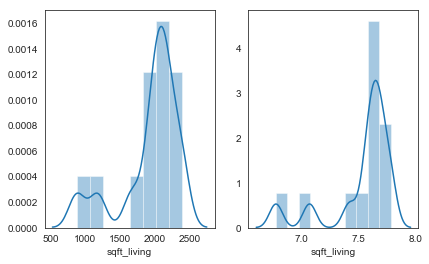

In [95]:
norm = sorted(np.random.normal(0, 1, 455))
f, ax = plt.subplots(figsize=(14,4))
plt.subplot(1, 4, 1)
sns.distplot(df_cont.sqft_living)
plt.subplot(1, 4, 2)
sns.distplot(np.log(df_cont.sqft_living))

plt.show()

# Bivariate

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value enco

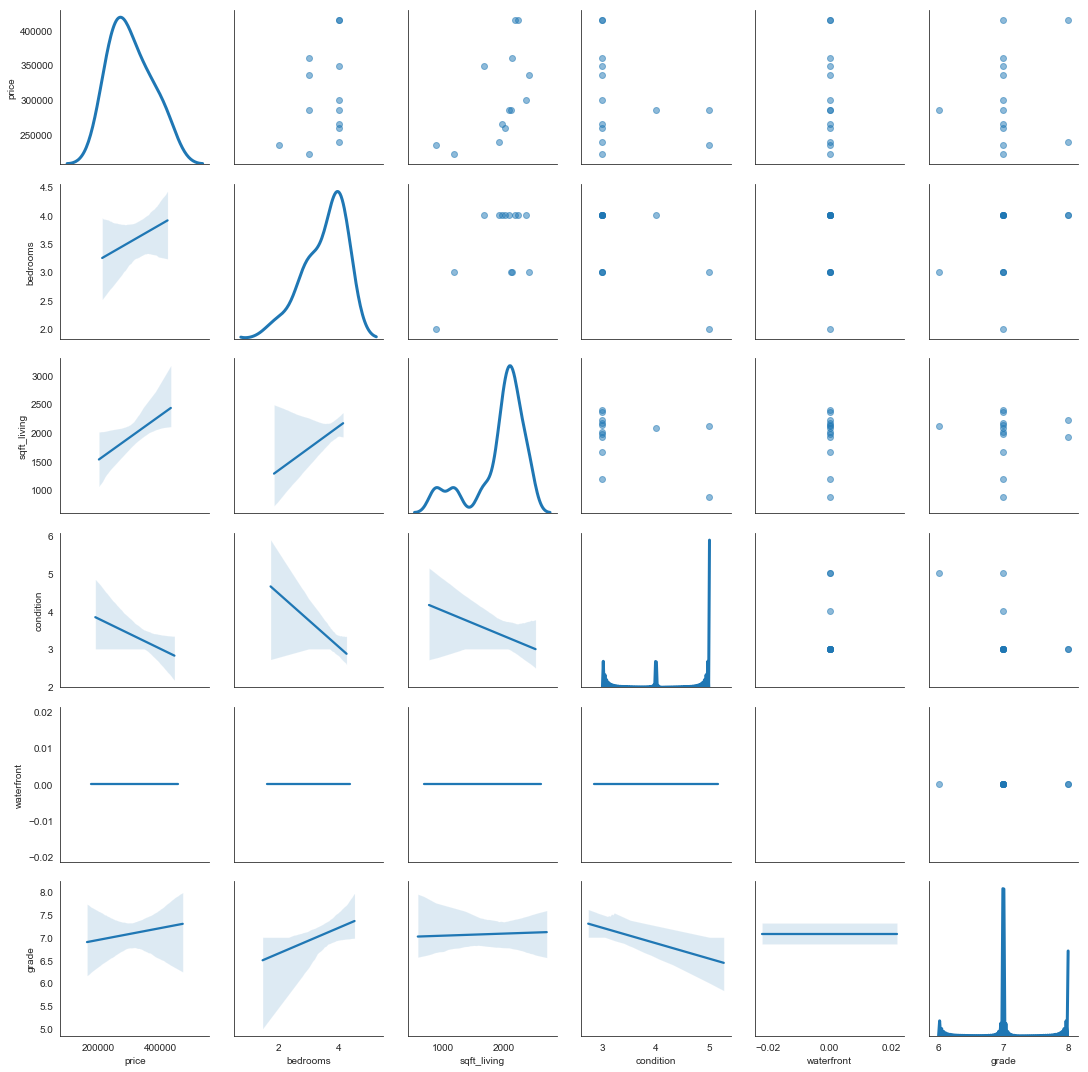

In [23]:
g = sns.PairGrid(df_corr.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()


Comparing all the variables except Zip Code. Some correlations are fairly clear: Price is strongly dependent on bedrooms, sqft_living, and grade. Less  on condition,waterfront

                price  bedrooms  sqft_living  condition  waterfront     grade
price        1.000000  0.306096     0.563365  -0.335659         NaN  0.168261
bedrooms     0.306096  1.000000     0.568384  -0.606866         NaN  0.373773
sqft_living  0.563365  0.568384     1.000000  -0.388567         NaN  0.041044
condition   -0.335659 -0.606866    -0.388567   1.000000         NaN -0.524295
waterfront        NaN       NaN          NaN        NaN         NaN       NaN
grade        0.168261  0.373773     0.041044  -0.524295         NaN  1.000000


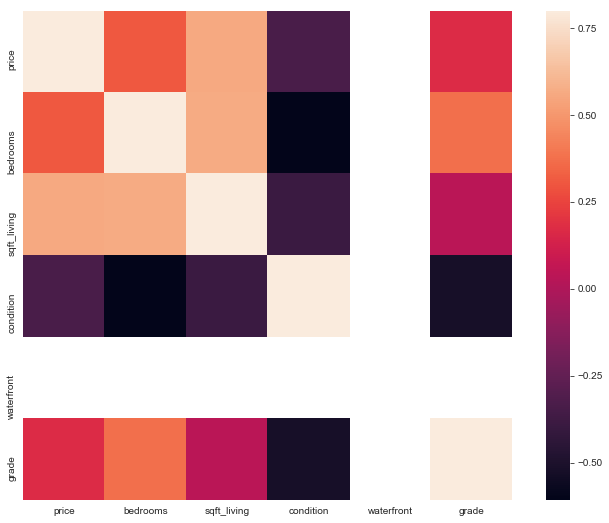

In [24]:
corrmat = df_corr.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


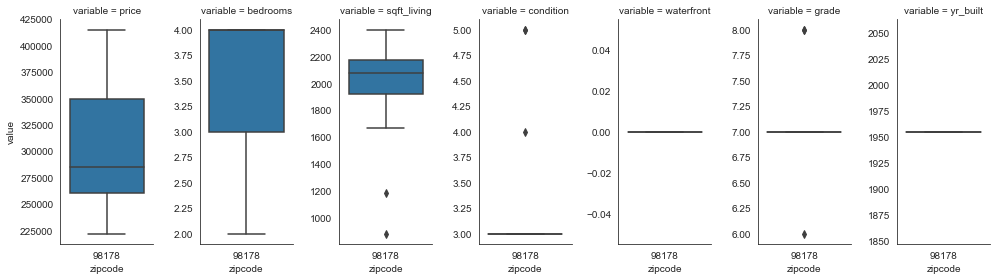

In [25]:
df_long = df_cont
df_long = pd.melt(df_long, id_vars=['zipcode'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5,sharey=False)
g = g.map(sns.boxplot, "zipcode", "value")
plt.show()




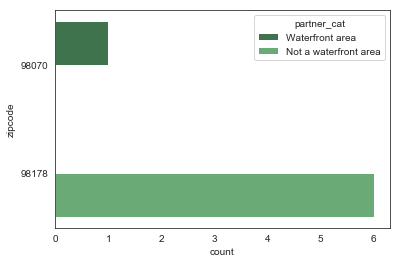

partner_cat  Not a waterfront area  Waterfront area
zipcode                                            
98070                            0                1
98178                            6                0
Power_divergenceResult(statistic=14.142857142857142, pvalue=0.0027170098181751)


In [32]:
df_2cat =  df_housing.loc[((df_housing['zipcode']==98178) | (df_housing['zipcode']==98070
))&(df_housing['yr_built']==1953),
    ['zipcode','waterfront']
]



# Create a text variable so that output is easier to interpret.
df_2cat['partner_cat'] = None
df_2cat.loc[df_2cat['waterfront'] == 1, 'partner_cat'] = 'Waterfront area'
df_2cat.loc[df_2cat['waterfront'] == 0, 'partner_cat'] = 'Not a waterfront area'
sns.countplot(y="zipcode", hue="partner_cat", data=df_2cat, palette="Greens_d")
plt.show()
counttable = pd.crosstab(df_2cat['zipcode'], df_2cat['partner_cat'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

PCA For existing variables

In [80]:
X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)


In [81]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1,5).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[0.42701225]
 [0.42290795]
 [0.45750434]
 [0.54024577]
 [0.37099014]]
Eigenvalue 1: 3.110979239978036
----------------------------------------
Eigenvector 2: 
[[ 0.34222022]
 [-0.50856404]
 [ 0.4861209 ]
 [ 0.13368819]
 [-0.60832711]]
Eigenvalue 2: 1.2489195975902034
----------------------------------------
Eigenvector 3: 
[[-0.05962411]
 [ 0.24648029]
 [ 0.62044249]
 [-0.73608785]
 [ 0.09443639]]
Eigenvalue 3: 0.1363048712354169
----------------------------------------
Eigenvector 4: 
[[-0.82192893]
 [ 0.11456539]
 [ 0.3593241 ]
 [ 0.38386335]
 [-0.18666205]]
Eigenvalue 4: 0.5344514884397515
----------------------------------------
Eigenvector 5: 
[[-0.14636821]
 [-0.69902341]
 [ 0.20078236]
 [ 0.03294815]
 [ 0.66973389]]
Eigenvalue 5: 0.3860114694232594
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.57433463 0.23056977 0.02516398 0.09866797 0.07126366]


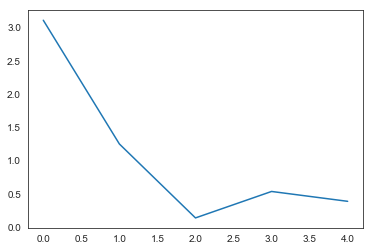

In [83]:
plt.plot(eig_val_cov)
plt.show()

Based on this analysis, Eigenvector 1 from PCA contains the most information, and 
includes the variables of the new feature that trend together: price,bedrooms,bathrooms,sqft_living,sqft_lot

# Chose  5 new features

In [47]:
df_feat = df_corr = df_cont.loc[:, 'price':]
df_feat.head()


,price,bedrooms,sqft_living,condition,waterfront,grade,yr_built,zipcode
0,221900.0,3,1180,3,0,7,1955,98178
1608,285000.0,3,2110,5,0,6,1955,98178
1805,240000.0,4,1920,3,0,8,1955,98178
3037,285000.0,4,2080,4,0,7,1955,98178
5625,235000.0,2,880,5,0,7,1955,98178


In [48]:
df_feat['sqrt_living'] = np.sqrt(df_feat.sqft_living)
#df_feat['waterfront']=np.where((df_feat['waterfront'].isin([0,1])), 'no waterfront', 'waterfront house')
df_feat['beds_x_living'] = df_feat.bedrooms * df_feat.sqft_living
df_feat['cond_x_sqft_living'] = df_feat.condition / df_feat.sqft_living
df_feat['sqr_living'] = df_feat.sqft_living ** 2
df_feat['yrbuilt_x_cond'] = df_feat.yr_built * df_feat.condition
df_feat.head()

,price,bedrooms,sqft_living,condition,waterfront,grade,yr_built,zipcode,sqrt_living,beds_x_living,cond_x_sqft_living,sqr_living,yrbuilt_x_cond
0,221900.0,3,1180,3,0,7,1955,98178,34.351128,3540,0.002542,1392400,5865
1608,285000.0,3,2110,5,0,6,1955,98178,45.934736,6330,0.002370,4452100,9775
1805,240000.0,4,1920,3,0,8,1955,98178,43.817805,7680,0.001563,3686400,5865
3037,285000.0,4,2080,4,0,7,1955,98178,45.607017,8320,0.001923,4326400,7820
5625,235000.0,2,880,5,0,7,1955,98178,29.664794,1760,0.005682,774400,9775


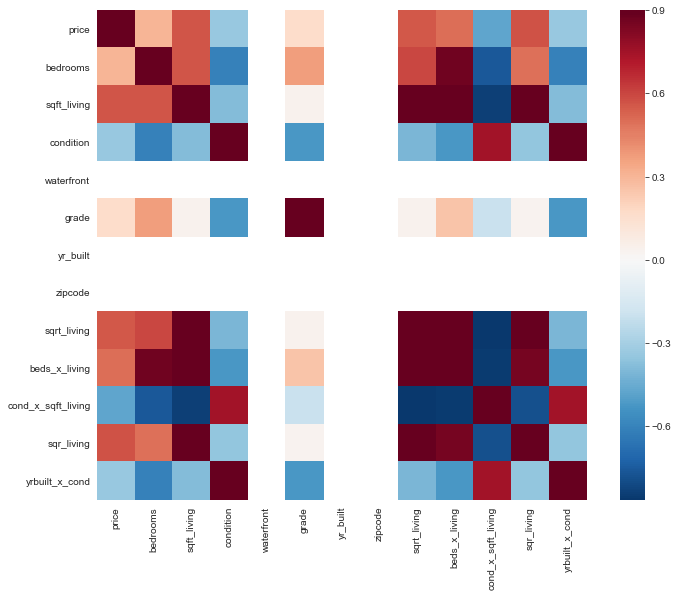

In [96]:
corrmat = df_feat.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.9, square=True, center=0, cmap="RdBu_r")
plt.show()

PCA For 5 new features

In [68]:

df_feat1=df_feat.loc[:, 'sqrt_living':'yrbuilt_x_cond']
X = StandardScaler().fit_transform(df_feat.loc[:, 'price':])


sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

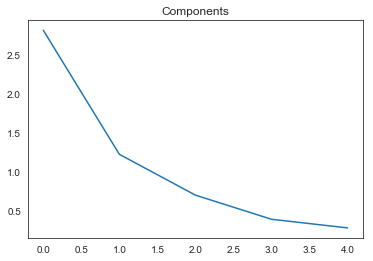

In [54]:
eig_vals = sklearn_pca.explained_variance_
eig_vecs = sklearn_pca.components_

plt.plot(eig_vals)
plt.title('Components')
plt.show()

In [55]:
ratios = sklearn_pca.explained_variance_ratio_
#print(eig_vals)
print(ratios)

[0.5184488  0.22606304 0.12984275 0.07298939 0.05265602]


In [70]:
X = StandardScaler().fit_transform(df_feat1)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)

In [72]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1,5).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.479692  ]
 [-0.47268574]
 [ 0.4794139 ]
 [-0.45993537]
 [ 0.32416902]]
Eigenvalue 1: 4.301450871187989
----------------------------------------
Eigenvector 2: 
[[-0.30755921]
 [-0.11386952]
 [-0.22381727]
 [-0.38327007]
 [-0.83393702]]
Eigenvalue 2: 0.885508539505252
----------------------------------------
Eigenvector 3: 
[[ 0.78500033]
 [-0.06830324]
 [ 0.32539209]
 [-0.50484755]
 [-0.13549205]]
Eigenvalue 3: 0.0024749162664648694
----------------------------------------
Eigenvector 4: 
[[-0.22866701]
 [ 0.85987088]
 [ 0.13416797]
 [-0.41849889]
 [ 0.12325218]]
Eigenvalue 4: 0.1476964495493939
----------------------------------------
Eigenvector 5: 
[[ 0.0823942 ]
 [-0.13985227]
 [-0.77213152]
 [-0.45994689]
 [ 0.4073258 ]]
Eigenvalue 5: 0.07953589015756397
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [7.94114007e-01 1.63478500e-01 4.56907618e-04 2.72670368e-02
 1.4683549

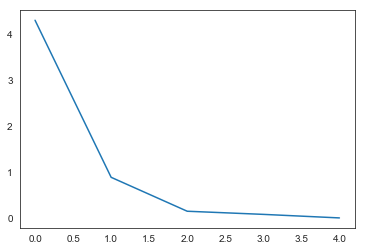

In [73]:
plt.plot(sorted(eig_val_cov, reverse=True))
plt.show()

Based on this analysis, Eigenvector 1 from PCA contains the most information, and includes the variables of the new feature that trend together: sqrt_living ,beds_x_living,cond_x_sqft_living,sqr_living,yrbuilt_x_cond

In [74]:
corrmat.price.sort_values()

cond_x_sqft_living   -0.474255
yrbuilt_x_cond       -0.335659
condition            -0.335659
grade                 0.168261
bedrooms              0.306096
beds_x_living         0.504333
sqrt_living           0.556228
sqft_living           0.563365
sqr_living            0.570056
price                 1.000000
waterfront                 NaN
yr_built                   NaN
zipcode                    NaN
Name: price, dtype: float64

# Conclusion

Price is the most representative of the entire dataset followed by bedrooms,bathrooms,sqft_living
